# Problem Set 1, due Jan 26th at 11:59pm 

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [2]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:      7.31.1 (need at least 1.0)
Numpy version:        1.21.5 (need at least 1.7.1)
SciPy version:         1.9.1 (need at least 0.12.0)
Pandas version:        1.4.4 (need at least 0.11.0)
Maplotlib version:     3.5.2 (need at least 1.2.1)
Scikit-Learn version:  1.0.2 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- *Person 1*
- *Person 2*
- ...

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [3]:
from sklearn.datasets import load_boston
bdata = load_boston()

/Users/shuyaowang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

The following commands will provide some basic information about the shape of the data:

In [4]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
# print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [5]:
boston = pd.DataFrame(bdata.data)

In [6]:
boston.columns = bdata.feature_names[:]
print(boston.shape)
print( bdata.target )


(506, 13)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 5

---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [7]:
# 1.1.1
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
# 1.1.2
boston['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [9]:
# 1.1.3
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [14]:
# 1.1.4
boston['MEDV'] = bdata.target
highest_five = boston.nlargest(5, 'MEDV')
highest_five['TAX']

161    403.0
162    403.0
163    403.0
166    403.0
186    193.0
Name: TAX, dtype: float64

*Summary results of 1.1*
 - 1.1.1: There are 13 different variables in the original dataset and 506 observations.
 - 1.1.2: There are 35 instances are classified as neightborhoods where the tract bounds the Charles River. 
 - 1.1.3: All the columns contains zero missing values from the result.
 - 1.1.4: The property tax rate in the 5 neighborhoods that have the highest median housing price are 403, 403, 403, 403, 193 per $10,000. 

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [34]:
# 1.2.1
boston['MEDV'].max()

50.0

In [35]:
# 1.2.2
len(boston[boston['RM'] < 5])

15

In [36]:
# 1.2.3
boston.loc[(boston['MEDV'] == boston['MEDV'].max()) & (boston['CHAS'] == 1), 'TAX']

162    403.0
163    403.0
283    198.0
369    666.0
370    666.0
372    666.0
Name: TAX, dtype: float64

In [38]:
# 1.2.4
boston.loc[(boston['MEDV'] == boston['MEDV'].max()), 'CRIM']

161    1.46336
162    1.83377
163    1.51902
166    2.01019
186    0.05602
195    0.01381
204    0.02009
225    0.52693
257    0.61154
267    0.57834
283    0.01501
368    4.89822
369    5.66998
370    6.53876
371    9.23230
372    8.26725
Name: CRIM, dtype: float64

In [39]:
# 1.2.5
boston.loc[(boston['MEDV'] == boston['MEDV'].min()), 'CRIM']

398    38.3518
405    67.9208
Name: CRIM, dtype: float64

*Summary results of 1.2:*
 - 1.2.1: The median housing price in Boston's most expensive neighborhood is $50,000.
 - 1.2.2: There are 15 neighborhoods have, on average, less than 5 rooms per dwelling.
 - 1.2.3: The property tax rate in the most expensive neighborhood that is also adjacent to the Charles River are 403.0, 403.0, 198.0, 666.0, 666.0, 666.0 per $10,000.
 - 1.2.4: The crime rate in the neighborhood with the highest median housing price are 1.46336, 1.83377, 1.51902, 2.01019, 0.05602, 0.01381, 0.02009, 0.52693, 0.61154, 0.57834, 0.01501, 4.89822, 5.66998, 6.53876, 9.2323, 8.26725 per capita by town.
 - 1.2.5: The crime rate in the neighborhood with the lowest median housing price are 38.3518, 67.9208 per capita by town.

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [20]:
df = pd.DataFrame({'Non-Missing': 506-boston.isna().sum(),
      'Mean': boston.mean(),
      'Std': boston.std(),
      'Min': boston.min(),
      'Median': boston.median(),
      'Max': boston.max() 
     })
df.index.name = 'Variables'
df = df.reset_index()
df


,Variable,Non-Missing,Mean,Std,Min,Median,Max
0,CRIM,506,3.613524,8.601545,0.00632,0.25651,88.9762
1,ZN,506,11.363636,23.322453,0.00000,0.00000,100.0000
2,INDUS,506,11.136779,6.860353,0.46000,9.69000,27.7400
3,CHAS,506,0.069170,0.253994,0.00000,0.00000,1.0000
4,NOX,506,0.554695,0.115878,0.38500,0.53800,0.8710
5,RM,506,6.284634,0.702617,3.56100,6.20850,8.7800
6,AGE,506,68.574901,28.148861,2.90000,77.50000,100.0000
7,DIS,506,3.795043,2.105710,1.12960,3.20745,12.1265
8,RAD,506,9.549407,8.707259,1.00000,5.00000,24.0000
9,TAX,506,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [43]:
# The null hypothesis is that there is no significant difference in median home values between houses that are adjacent and are not adjacent the Charles River 
# The alternate hypothesis is that there is a significant difference in median home values between houses that are adjacent and are not adjacent the Charles River 
coefficient, pvalue = sp.stats.ttest_ind(boston[boston['CHAS'] == 0]['MEDV'],
                   boston[boston['CHAS'] == 1]['MEDV'])
print(coefficient, pvalue)


-3.996437466090509 7.390623170519905e-05


Since the p-value is less than 0.05, we reject the null. There is a significant difference in median home values between houses that are adjacent and are not adjacent the Charles River.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


(array([ 3.,  1.,  7., 10.,  3., 10.,  9.,  9., 24., 18., 16., 16., 22.,
        25., 37., 36., 31., 35., 37., 25., 11.,  8.,  9., 10., 10.,  7.,
         8.,  7.,  9.,  5.,  4.,  6.,  5.,  1.,  1.,  0.,  2.,  2.,  3.,
         2.,  1.,  2.,  0.,  3., 16.]),
 array([ 5000,  6000,  7000,  8000,  9000, 10000, 11000, 12000, 13000,
        14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000,
        23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000,
        32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000,
        41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000,
        50000]),
 <BarContainer object of 45 artists>)

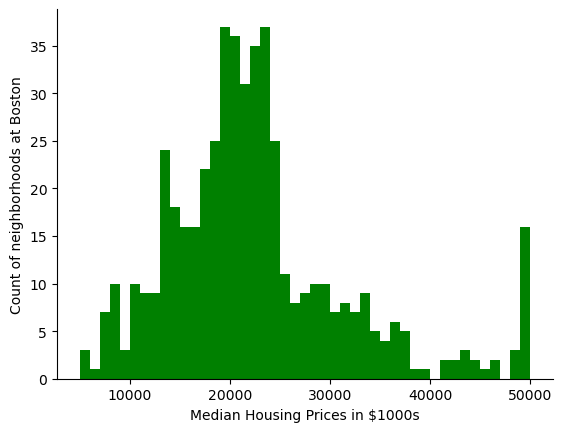

In [39]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  

# Edit the code below to make the graph look good

plt.xlabel('Median Housing Prices in $1000s')
plt.ylabel('Number of neighborhoods at Boston')
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.hist(bdata.target * 1000, bins = np.arange(5000, 51000, 1000), color = 'green', edgecolor = 'none')


### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


Text(0, 0.5, 'Median value of home $1000s')

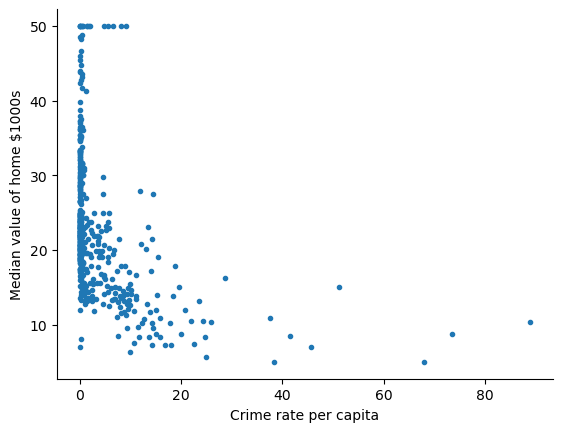

In [40]:
plt.scatter(x = boston['CRIM'], y = boston['MEDV'], marker = '.')
plt.xlabel('Crime rate per capita')
plt.ylabel('Median value of home $1000s')

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

The scatterplot shows that there exists a weak negative correlation between the two variables. As crim increases, the medv decreases. Therefore, as the Per Capita Crime Rate by town worsens, the median value of owner-occupied homes drops. 

I think they are just correlation because the price of the home can not directly lead to the number of crime. There are other factors related to the crim cacses. For example, police management budget may directly related to the number of crime cases. And since the people who live in high price places may be willing to pay more for the police management, it indirectly leads the low number of crime cases. 

In [134]:
from scipy.stats import pearsonr
corr, _ = pearsonr(boston['CRIM'],boston['MEDV'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.388


### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

In [42]:
corr = boston.corr()
import seaborn as sb
cmap = sb.diverging_palette(10, 500, as_cmap = True)
corr.style.background_gradient(cmap, axis = 1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)

/var/folders/z1/j91g8rbs0z5_97z1vqszz6lw0000gn/T/ipykernel_21942/2222915442.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1)\


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Thus, the most poitively correlated ones is TAX and RAD. The most negatively correlated ones is NOX and DIS.

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

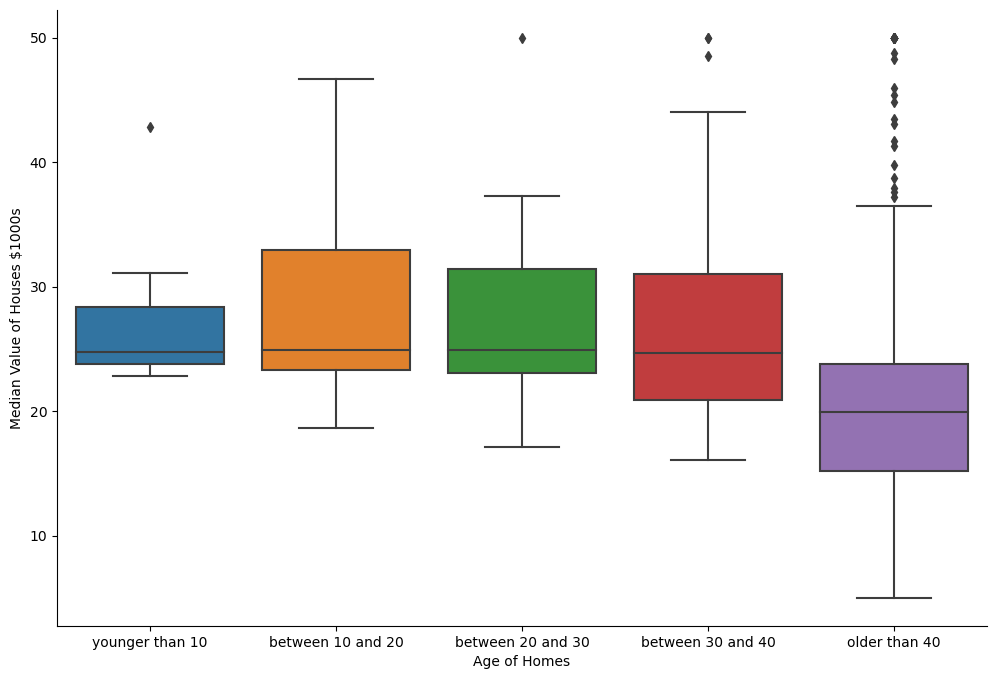

In [50]:
boston.loc[(boston['AGE'] <= 10), 'age_group'] = 'younger than 10'
boston.loc[(boston['AGE'] > 10)&(boston['AGE'] < 20), 'age_group'] = 'between 10 and 20'
boston.loc[(boston['AGE'] > 20)&(boston['AGE'] < 30), 'age_group'] = 'between 20 and 30'
boston.loc[(boston['AGE'] > 30)&(boston['AGE'] < 40), 'age_group'] = 'between 30 and 40'
boston.loc[(boston['AGE'] >= 40), 'age_group'] = 'older than 40'
plt.figure(figsize = (12,8))
ax = sb.boxplot(x = 'age_group', y = 'MEDV', order = ['younger than 10', 'between 10 and 20', 'between 20 and 30', 'between 30 and 40', 'older than 40'], data = boston).set(ylabel = 'Median Value of Houses $1000s', xlabel = 'Age of Homes')

From the graph, we are suprised to see that people in Boston who are older than 40 years old have lowest aaverage median values of houses, which is much lower than what young people have. The group of 10 and 20 data tells us that children who can still live in Boston at that age may have relatively larger capitals of family. The outliers of the group increases with age increase. It may explain the gap between rich and poor without support of family.  